##Adaptive reinforcement learning for population dependent prey switching

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
import seaborn as sns
import networkx as nx

In [ ]:
# p1,p2 are the net effect rate (including birth rate,death rate,and emigration rate)
# k is the carrying capacity of both prey species
# β1 β2 are the predation rate of prey1 and prey2 respectively 
# μ1  is the death rate of the predator

def preypred(v,t,p1,p2,beta1,beta2,u1,k):
  dydt=[v[0]*p1*(1-v[0]/k) + v[1]-((beta1*v[0]*v[1]*v[2])/(v[0]+v[1])), v[1]*p2*(1-v[1]/k) + v[0]-((beta2*v[0]*v[1]*v[2])/(v[0]+v[1])), v[2]*(-u1+((beta1*beta2*v[0]*v[1])/(v[0]+v[1])))]
  return dydt

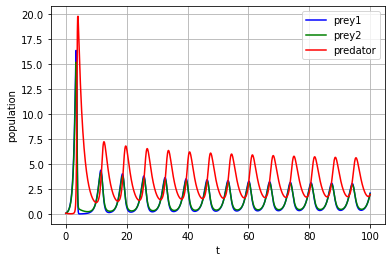

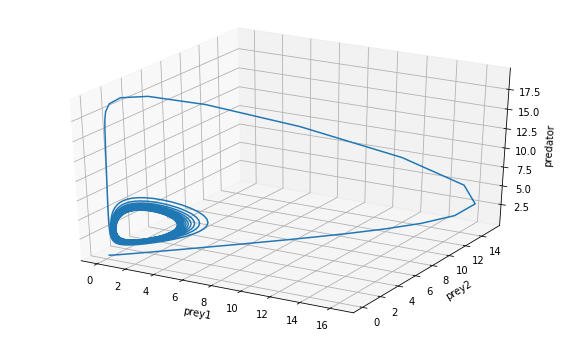

In [ ]:
# #Parameters for co-existence
# p1=1.3
# p2=0.8
# beta1=0.6
# beta2=0.8
# u1=0.5
# k=1.8

#Parameters for Hopf-Bifurcation
p1=0.66
p2=0.5
beta1=1
beta2=0.9
u1=0.6
k=10000

# Initial conditions
init = [0.1, 0.1, 0.1]

# Timeline
t = np.linspace(0, 100, 1000)

#Integrate
solpreypred = odeint(preypred, init, t, args = (p1,p2,beta1,beta2,u1,k))
# print(solpreypred[:, 0])
# print(solpreypred[:, 1])

# Plot
plt.plot(t, solpreypred[:, 0], 'b', label='prey1')
plt.plot(t, solpreypred[:, 1], 'g', label='prey2')
plt.plot(t, solpreypred[:, 2], 'r', label='predator')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('population')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.set_xlabel('prey1')
ax.set_ylabel('prey2')
ax.set_zlabel('predator')
ax.plot3D(solpreypred[:, 0],solpreypred[:, 1],solpreypred[:, 2])
ax.grid()
plt.show()

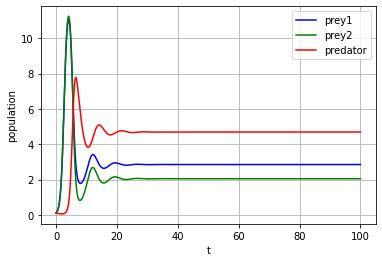

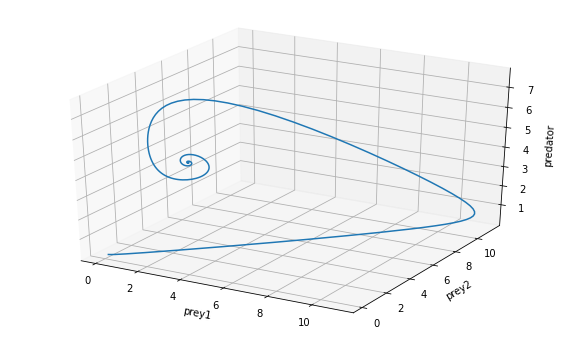

In [ ]:
#Parameters for co-existence
p1=0.9
p2=0.8
beta1=0.6
beta2=0.7
u1=0.5
k=5.8

# #Parameters for Hopf-Bifurcation
# p1=0.68
# p2=0.5
# beta1=1
# beta2=0.9
# u1=0.6
# k=10000

# Initial conditions
init = [0.1, 0.1, 0.1]

# Timeline
t = np.linspace(0, 100, 100)

#Integrate
solpreypred = odeint(preypred, init, t, args = (p1,p2,beta1,beta2,u1,k))
# print(solpreypred[:, 0])
# print(solpreypred[:, 1])

# Plot
plt.plot(t, solpreypred[:, 0], 'b', label='prey1')
plt.plot(t, solpreypred[:, 1], 'g', label='prey2')
plt.plot(t, solpreypred[:, 2], 'r', label='predator')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('population')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.set_xlabel('prey1')
ax.set_ylabel('prey2')
ax.set_zlabel('predator')
ax.plot3D(solpreypred[:, 0],solpreypred[:, 1],solpreypred[:, 2])
ax.grid()
plt.show()

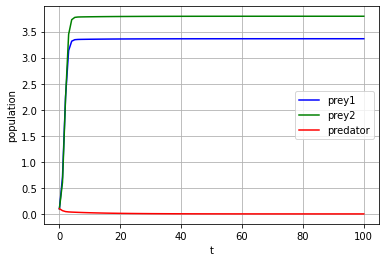

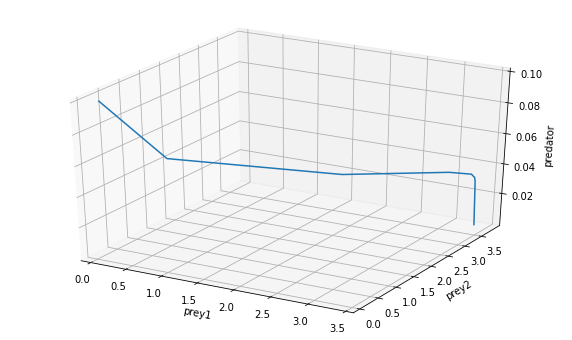

3.3355707590381885e-05


In [ ]:
#Perturbation test
#Parameters for co-existence
p1=1.3
p2=0.8
beta1=0.6
beta2=0.4
u1=0.5
k=1.8

# Initial conditions
init = [0.1, 0.1, 0.1]

# Timeline
t = np.linspace(0, 100, 100)

#Integrate
solpreypred = odeint(preypred, init, t, args = (p1,p2,beta1,beta2,u1,k))
# print(solpreypred[:, 0])
# print(solpreypred[:, 1])

# Plot
plt.plot(t, solpreypred[:, 0], 'b', label='prey1')
plt.plot(t, solpreypred[:, 1], 'g', label='prey2')
plt.plot(t, solpreypred[:, 2], 'r', label='predator')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('population')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.set_xlabel('prey1')
ax.set_ylabel('prey2')
ax.set_zlabel('predator')
ax.plot3D(solpreypred[:, 0],solpreypred[:, 1],solpreypred[:, 2])
ax.grid()
plt.show()
print(solpreypred[:, 2][-1])

In [ ]:
points_list = [(0,1), (1,2), (1,3)]

In [ ]:
def initReward(points_list, preySelected):
  for point in points_list:
    # print(point,point[::-1])
    if point[1] == preySelected: #rewarding the goal index
      reward_matrix[point] = 100
    else:
      reward_matrix[point] = 0

    if point[0] == preySelected: #rewarding the goal index by checking both directions
      reward_matrix[point[::-1]] = 100
    else:
      reward_matrix[point[::-1]] = 0

  reward_matrix[preySelected,preySelected] = 100
  return reward_matrix

In [ ]:
gamma = 0.8 #Learninig Parameter

# initial_state = 1

def available_actions(state): #This function finds out where the agent can go to from the current state
  current_state_row = reward_matrix[state,] #get the initial/current state row
  av_act = np.where(current_state_row >= 0)[1] #Find out which direction is available to explore
  return av_act

# available_act = available_actions(initial_state)
# print("available_act",available_act)

def sample_next_action(available_actions_range): #Randomly select the next sate from the available states
  next_action = int(np.random.choice(available_act,1))
  return next_action

# action = sample_next_action(available_act)
# print("action",action)

def update(current_state, action, gamma): #function for updating the Q matrix
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] # Finding which index or state has the highest reward. In other words, where should the agent go next to increase its reward.
  # print("max_index of the action taken where reward is highest",max_index)

  if max_index.shape[0] > 1: #If multiple states have high reward, randomly choose any state.
    max_index = int(np.random.choice(max_index, size=1))
  else:
    max_index = int(max_index) #Else select the index with maximum reward
  # print("chosen max_index", max_index)  
  max_value = Q[action, max_index] #Basically telling us that the action taken has a reward candidate. This is the value of the state the agent should go from the current state to any other state that increases the reward.
  # print("value of the action taken and the max_index chosen",max_value)

  Q[current_state, action] = reward_matrix[current_state, action] + gamma * max_value #Update Q matrix with regards to reward. This is essentially telling what steps to take to reach the final goal by giving a reward for a correct step.
  # print("reward from going from current_state",current_state, "to action taken state",action, reward_matrix[current_state, action], "added reward",gamma * max_value)
  # print("Updated Q with added reward",Q)
  # print('Max value', reward_matrix[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q) * 100))
  else:
    return (0)

def nodePlot(steps):
    mapping={0:'0',1:'1', 2:'Prey1', 3:'Prey2'}
    G=nx.DiGraph()
    G.add_edge(steps[0],steps[1])
    G.add_edge(steps[1],steps[2])
    H=nx.relabel_nodes(G,mapping)
    pos = nx.spring_layout(H)
    nx.draw_networkx_nodes(H, pos)
    nx.draw_networkx_edges(H, pos)
    nx.draw_networkx_labels(H, pos)
    plt.show()

# update(initial_state, action, gamma)

time at which freq changed 11.11111111111111
time at which freq changed 22.22222222222222
time at which freq changed 66.66666666666666
time at which freq changed 77.77777777777777
time at which freq changed 100.0


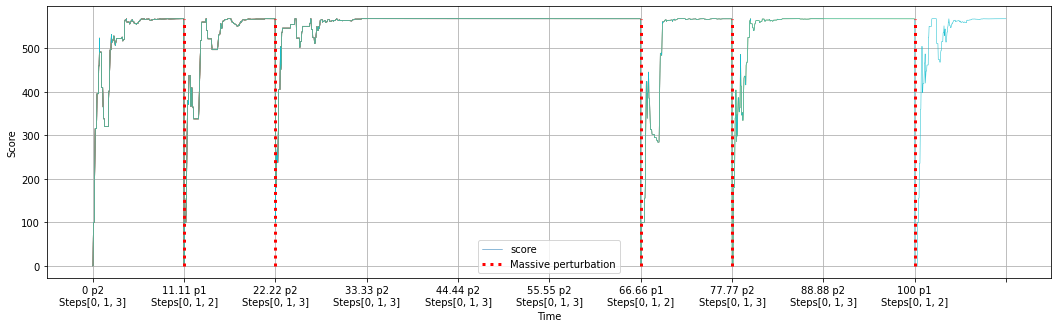

In [ ]:
scores = []
freqList=[]
steptaken=[]
legendset=0
fig, ax = plt.subplots(1,1, figsize=(18,5))
for i in range(len(t)):
  MATRIX_SIZE = 4
  reward_matrix = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
  reward_matrix *= -1
  reward_matrix #Initialize reward matrix

  #Select prey based on frequency
  preySelected = 0
  if solpreypred[:, 0][i] > solpreypred[:, 1][i]:
    preySelected = 2
  else:
    preySelected = 3
  freqList.append(preySelected)
  # print("preySelected",preySelected)

  if i==0:
    legendset=1
    reward_matrix = initReward(points_list, preySelected)
    # print(reward_matrix)

    # Training
    Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
    # print("InitQ", Q) #Initialize Q matrix
    # print("Reward Matrix", reward_matrix)
    for j in range(300):
        current_state = np.random.randint(0, int(Q.shape[0])) #Randomly start with any initial state
        # print('Current State',current_state)
        available_act = available_actions(current_state) #Find available actions
        # print("available_act",available_act)
        action = sample_next_action(available_act) # Select a random action
        # print("action",action)
        score = update(current_state,action,gamma)# Get score from that action
        scores.append(score)
        # print ('Score:', str(score))
    # plt.plot(scores,t)

    # print("Trained Q matrix:")
    # print(Q/np.max(Q)*100)

    # Testing
    current_state = 0
    steps = [current_state]
    while current_state != preySelected:
        next_step_index = np.where(Q[current_state,]
            == np.max(Q[current_state,]))[1]
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index
    # nodePlot(steps)
    steptaken.append(str(steps))
  
  elif freqList[i]!=freqList[i-1]:
    print("time at which freq changed",t[i])
    if legendset==1:
      ax.vlines(len(scores), ymin=0, ymax=scores[-1], colors='r', zorder=100, ls=':', lw=3, label='Massive perturbation')
      legendset=0
    else:
      ax.vlines(len(scores), ymin=0, ymax=scores[-1], colors='r', zorder=100, ls=':', lw=3)
    reward_matrix = initReward(points_list, preySelected)
    # print(reward_matrix)
    # Training
    Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
    # print("InitQ", Q) #Initialize Q matrix
    # print("Reward Matrix", reward_matrix)
    for i in range(300):
        current_state = np.random.randint(0, int(Q.shape[0])) #Randomly start with any initial state
        # print('Current State',current_state)
        available_act = available_actions(current_state) #Find available actions
        # print("available_act",available_act)
        action = sample_next_action(available_act) # Select a random action
        # print("action",action)
        score = update(current_state,action,gamma)# Get score from that action
        scores.append(score)
        # print ('Score:', str(score))
    # print("Trained Q matrix:")
    # print(Q/np.max(Q)*100)

    # Testing
    current_state = 0
    steps = [current_state]
    while current_state != preySelected:
        next_step_index = np.where(Q[current_state,]
            == np.max(Q[current_state,]))[1]
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index
    # nodePlot(steps)
    steptaken.append(str(steps))

  else:
    for i in range(300):
      scores.append(scores[-1])
    # Testing
    current_state = 0
    steps = [current_state]
    while current_state != preySelected:
        next_step_index = np.where(Q[current_state,]
            == np.max(Q[current_state,]))[1]
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index
    # nodePlot(steps)
    steptaken.append(str(steps))

  if i==0:
    ax.plot(scores, lw=0.5, label='score')
  else:
    ax.plot(scores, lw=0.5)

ax.axes.set_xticks([0,300,600,900,1200,1500,1800,2100,2400,2700,3000])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0]=str(0) + " p"+str(freqList[0]-1) + "\nSteps" + steptaken[0]
labels[1]=str(11.11) + " p"+str(freqList[1]-1) + "\nSteps" + steptaken[1]
labels[2]=str(22.22) + " p"+str(freqList[2]-1) + "\nSteps" + steptaken[2]
labels[3]=str(33.33) + " p"+str(freqList[3]-1) + "\nSteps" + steptaken[3]
labels[4]=str(44.44) + " p"+str(freqList[4]-1) + "\nSteps" + steptaken[4]
labels[5]=str(55.55) + " p"+str(freqList[5]-1) + "\nSteps" + steptaken[5]
labels[6]=str(66.66) + " p"+str(freqList[6]-1) + "\nSteps" + steptaken[6]
labels[7]=str(77.77) + " p"+str(freqList[7]-1) + "\nSteps" + steptaken[7]
labels[8]=str(88.88) + " p"+str(freqList[8]-1) + "\nSteps" + steptaken[8]
labels[9]=str(100) + " p"+str(freqList[9]-1) + "\nSteps" + steptaken[9]
ax.axes.set_xticklabels(labels)
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.grid()
ax.legend(loc='best')
plt.show()

InitQ [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Reward Matrix [[ -1.   0.  -1.  -1.]
 [  0.  -1.   0. 100.]
 [ -1.   0.  -1.  -1.]
 [ -1.   0.  -1. 100.]]
Current State 0
available_act [1]
action 1
max_index of the action taken where reward is highest [0 1 2 3]
chosen max_index 1
value of the action taken and the max_index chosen 0.0
reward from going from current_state 0 to action taken state 1 0.0 added reward 0.0
Updated Q with added reward [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Max value 0.0
Score: 0
Current State 2
available_act [1]
action 1
max_index of the action taken where reward is highest [0 1 2 3]
chosen max_index 0
value of the action taken and the max_index chosen 0.0
reward from going from current_state 2 to action taken state 1 0.0 added reward 0.0
Updated Q with added reward [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Max value 0.0
Score: 0
Current State 3
available_act [1 3]
action 3
max_index of the action tak

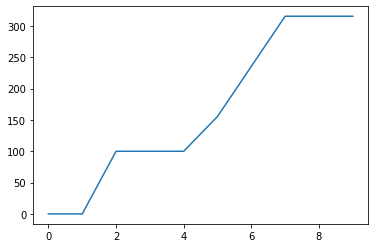

In [ ]:
#For process explainability
MATRIX_SIZE = 4
reward_matrix = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
reward_matrix *= -1
reward_matrix #Initialize reward matrix
reward_matrix = initReward(points_list, preySelected)
# Training
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
print("InitQ", Q) #Initialize Q matrix
print("Reward Matrix", reward_matrix)
scores = []
for i in range(10):
    current_state = np.random.randint(0, int(Q.shape[0])) #Randomly start with any initial state
    print('Current State',current_state)
    available_act = available_actions(current_state) #Find available actions
    print("available_act",available_act)
    action = sample_next_action(available_act) # Select a random action
    print("action",action)
    score = update(current_state,action,gamma)# Get score from that action
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != preySelected:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

InitQ [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Reward Matrix [[ -1.   0.  -1.  -1.]
 [  0.  -1.   0. 100.]
 [ -1.   0.  -1.  -1.]
 [ -1.   0.  -1. 100.]]
Current State 2
available_act [1]
action 1
Score: 0
Current State 1
available_act [0 2 3]
action 2
Score: 0
Current State 1
available_act [0 2 3]
action 0
Score: 0
Current State 2
available_act [1]
action 1
Score: 0
Current State 2
available_act [1]
action 1
Score: 0
Current State 0
available_act [1]
action 1
Score: 0
Current State 3
available_act [1 3]
action 3
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 100.0
Current State 1
available_act [0 2 3]
action 3
Score: 155.55555555555554
Current State 3
available_act [1 3]
action 3
Score: 200.0
Current State 1
available_act [0 2 3]

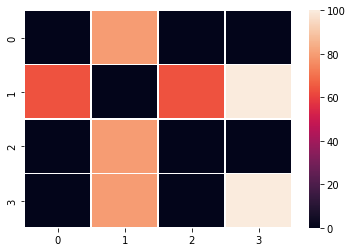

Most efficient path:
[0, 1, 3]


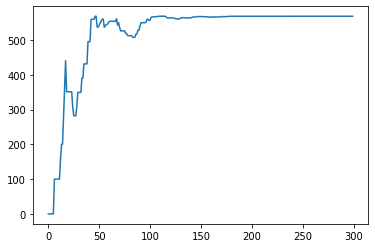

In [ ]:
#For individual learning
preySelected=3
MATRIX_SIZE = 4
reward_matrix = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
reward_matrix *= -1
reward_matrix #Initialize reward matrix
reward_matrix = initReward(points_list, preySelected)

# Training
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
print("InitQ", Q) #Initialize Q matrix
print("Reward Matrix", reward_matrix)
scores = []
for i in range(300):
    current_state = np.random.randint(0, int(Q.shape[0])) #Randomly start with any initial state
    print('Current State',current_state)
    available_act = available_actions(current_state) #Find available actions
    print("available_act",available_act)
    action = sample_next_action(available_act) # Select a random action
    print("action",action)
    score = update(current_state,action,gamma)# Get score from that action
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)
hx=sns.heatmap(Q/np.max(Q)*100, linewidth=0.5)
plt.show()

# Testing
current_state = 0
steps = [current_state]

while current_state != preySelected:
    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [ ]:
#For Failed State
preySelected=3
MATRIX_SIZE = 4
reward_matrix = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
reward_matrix *= -1
reward_matrix #Initialize reward matrix

for point in points_list:
  # print(point,point[::-1])
  if point[1] == preySelected: #rewarding the goal index
    reward_matrix[point] = 100
  else:
    reward_matrix[point] = 1000

  if point[0] == preySelected: #rewarding the goal index by checking both directions
    reward_matrix[point[::-1]] = 100
  else:
    reward_matrix[point[::-1]] = 1000

reward_matrix[preySelected,preySelected] = 100

InitQ [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Reward Matrix [[  -1. 1000.   -1.   -1.]
 [1000.   -1. 1000.  100.]
 [  -1. 1000.   -1.   -1.]
 [  -1. 1000.   -1.  100.]]
Current State 1
available_act [0 2 3]
action 0
Score: 100.0
Current State 2
available_act [1]
action 1
Score: 155.55555555555554
Current State 1
available_act [0 2 3]
action 0
Score: 155.55555555555554
Current State 3
available_act [1 3]
action 1
Score: 255.55555555555554
Current State 0
available_act [1]
action 1
Score: 355.55555555555554
Current State 0
available_act [1]
action 1
Score: 355.55555555555554
Current State 1
available_act [0 2 3]
action 2
Score: 362.29508196721315
Current State 2
available_act [1]
action 1
Score: 338.48238482384824
Current State 0
available_act [1]
action 1
Score: 377.5067750677507
Current State 0
available_act [1]
action 1
Score: 377.5067750677507
Current State 2
available_act [1]
action 1
Score: 377.5067750677507
Current State 1
available_act [0 2 3]
action 2
Score:

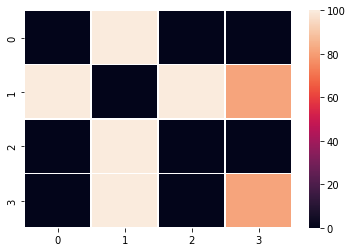

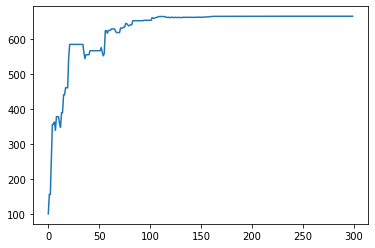

In [ ]:
# Training
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
print("InitQ", Q) #Initialize Q matrix
print("Reward Matrix", reward_matrix)
scores = []
for i in range(300):
    current_state = np.random.randint(0, int(Q.shape[0])) #Randomly start with any initial state
    print('Current State',current_state)
    available_act = available_actions(current_state) #Find available actions
    print("available_act",available_act)
    action = sample_next_action(available_act) # Select a random action
    print("action",action)
    score = update(current_state,action,gamma)# Get score from that action
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)
hx=sns.heatmap(Q/np.max(Q)*100, linewidth=0.5)
plt.show()
plt.plot(scores)
plt.show()

In [ ]:
# Testing
current_state = 0
steps = [current_state]
while current_state != preySelected:
    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()